Data Visualization with Python Final Project

In [7]:
import numpy as np
import pandas as pd

!conda install -c anaconda xlrd --yes

import matplotlib as mpl
import matplotlib.pyplot as plt

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.8.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



## Question 1: 
Create a readable dataframe from the given csv file
<hr>

In [58]:
df_TSA =pd.read_csv('https://cocl.us/datascience_survey_data', index_col =0)

print('Data woho!')


Data woho!


In [61]:
df_TSA.head(6)

,Very interested,Somewhat interested,Not interested
Big Data (Spark / Hadoop),1332,729,127
Data Analysis / Statistics,1688,444,60
Data Journalism,429,1081,610
Data Visualization,1340,734,102
Deep Learning,1263,770,136
Machine Learning,1629,477,74


In [16]:
# Load matplot lib 
#create bar plot

%matplotlib inline


In [34]:
#sort the data
df_TSA.sort_values(['Very interested'], ascending=False, axis=0, inplace=True)

#convert to % note that ,2 will round to two decimal places
df_TSA = round((df_TSA/2233)*100,2)

#Check info
df_TSA.head()

,Very interested,Somewhat interested,Not interested
Data Analysis / Statistics,75.59,19.88,2.69
Machine Learning,72.95,21.36,3.31
Data Visualization,60.01,32.87,4.57
Big Data (Spark / Hadoop),59.65,32.65,5.69
Deep Learning,56.56,34.48,6.09


## Question 2
Use Matplotlib to create a bar chart to visualize the percentage of respondants' interest in the different data science topics surveyed.
<hr>

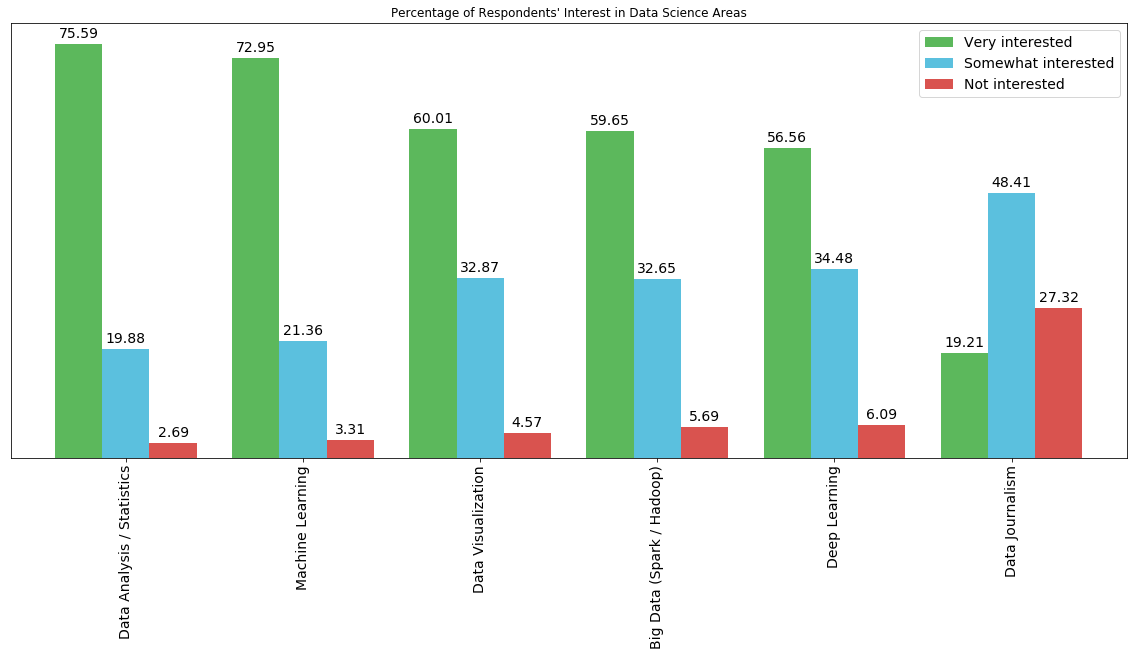

In [56]:
#Plotting the Data
ax = df_TSA.plot( kind='bar', 
                figsize=(20,8),
                color = ['#5cb85c','#5bc0de','#d9534f'],
                width=.8,
                fontsize=14)

#Plot Title
ax.set_title("Percentage of Respondents' Interest in Data Science Areas")

#background Color
ax.set_facecolor('white')

#Legend font and color
ax.legend(fontsize=14, facecolor ='white')

#boarder change
ax.get_yaxis().set_visible(False)

#display percentage

for p in ax.patches:
    ax.annotate(np.round(p.get_height(),decimals=2), 
                (p.get_x()+p.get_width()/2., p.get_height()), 
                ha='center', 
                va='center', 
                xytext=(0, 10), 
                textcoords='offset points',
                fontsize = 14
               )
plt.show()

## Question 3
Convert the San Francisco dataset into a pandas dataframe that represents the total number of crimes in each neighborhood.
<hr>

In [38]:
 df_SF =pd.read_csv('https://cocl.us/sanfran_crime_dataset')


In [39]:
df_SF.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [41]:
df_SF.shape

(150500, 13)

In [42]:
df_SF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150500 entries, 0 to 150499
Data columns (total 13 columns):
IncidntNum    150500 non-null int64
Category      150500 non-null object
Descript      150500 non-null object
DayOfWeek     150500 non-null object
Date          150500 non-null object
Time          150500 non-null object
PdDistrict    150499 non-null object
Resolution    150500 non-null object
Address       150500 non-null object
X             150500 non-null float64
Y             150500 non-null float64
Location      150500 non-null object
PdId          150500 non-null int64
dtypes: float64(2), int64(2), object(9)
memory usage: 14.9+ MB


In [48]:
df_N=df_SF['PdDistrict'].value_counts()


df_N1 = pd.DataFrame(data=df_N.values, index = df_N.index, columns=['Count'])

df_N1=df_N1.reindex(["CENTRAL", "NORTHERN", "PARK", "SOUTHERN", "MISSION", "TENDERLOIN", "RICHMOND", "TARAVAL", "INGLESIDE", "BAYVIEW"])

df_N1 =df_N1.reset_index()

df_N1.rename({'index': 'Neighborhood'}, axis='columns', inplace=True)

df_N1

,Neighborhood,Count
0,CENTRAL,17666
1,NORTHERN,20100
2,PARK,8699
3,SOUTHERN,28445
4,MISSION,19503
5,TENDERLOIN,9942
6,RICHMOND,8922
7,TARAVAL,11325
8,INGLESIDE,11594
9,BAYVIEW,14303


## Question 4
Create a choropleth map that illustrates the crime rates in each neighborhood in San Francisco
<hr>

In [49]:
import folium

In [53]:
geojson= r'https://cocl.us/sanfran_geojson'

SFC_map =folium.Map(location =[37.77, -122.431], zoom_start = 12)

In [55]:
SFC_map.choropleth(geo_data=geojson,
                  data=df_N1,
                   columns=['Neighborhood', 'Count'],
                   key_on='feature.properties.DISTRICT',
                   fill_color='YlOrRd',
                   fill_opacity=0.7,
                   line_opacity=0.2,
                   legend_name='Crime Rate in San Francisco'
                  )
SFC_map